<a href="https://www.kaggle.com/code/smithakishan/used-car-price-prediction?scriptVersionId=117990039" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# import the required library

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/carvana-predict-car-prices/carvana.csv


In [2]:
#import the dataset
data=pd.read_csv("/kaggle/input/carvana-predict-car-prices/carvana.csv")

In [3]:
#display the first 10 rows of the dataframe
data.head(10)

,Name,Year,Miles,Price
0,Chevrolet Trax,2018,41946,16990
1,GMC Terrain,2020,45328,23990
2,Jeep Wrangler,2012,81068,21590
3,Jeep Renegade,2019,35372,21590
4,BMW X,20173,68992,22990
5,Buick Encore,2019,47973,18590
6,Jeep Compass,2016,57159,17590
7,Jeep Compass,2017,47619,18590
8,Jeep Patriot,2015,51472,17590
9,Jeep Compass,2016,33218,17990


In [4]:
#display the last 10 rows of the dataframe 
data.tail(10)

,Name,Year,Miles,Price
21990,Nissan Rogue,2015,54894,16990
21991,Chevrolet Cruze,2015,83838,13990
21992,Ford Taurus,2015,93601,15990
21993,Honda Civic,2015,98764,16990
21994,Volkswagen Jetta,2015,66523,14590
21995,Honda Accord,2014,98085,17590
21996,Dodge Charger,2016,62616,23990
21997,Ford Taurus,2013,50345,16990
21998,Toyota Corolla Hatchback,2020,27945,23990
21999,Honda Civic,2012,70676,14990


## Understanding the data

In [5]:
data.shape

(22000, 4)

In [6]:
data.describe()

,Year,Miles,Price
count,2.200000e+04,22000.000000,22000.000000
mean,1.946648e+05,54445.697318,20707.285136
std,1.630370e+06,25685.933926,6535.580304
min,2.009000e+03,53.000000,10990.000000
25%,2.014000e+03,35512.000000,16590.000000
50%,2.017000e+03,51890.000000,19590.000000
75%,2.020000e+03,73191.000000,22990.000000
max,2.022350e+07,120167.000000,102990.000000


In [7]:
0.1*data['Price'].mean()

2070.728513636364

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22000 entries, 0 to 21999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    22000 non-null  object
 1   Year    22000 non-null  int64 
 2   Miles   22000 non-null  int64 
 3   Price   22000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 687.6+ KB


There are no missing values

In [9]:
data.dtypes

Name     object
Year      int64
Miles     int64
Price     int64
dtype: object

In [10]:
data.isnull().sum()

Name     0
Year     0
Miles    0
Price    0
dtype: int64

In [11]:
data.nunique()

Name      416
Year      211
Miles    8836
Price     866
dtype: int64

In [12]:
data.Name.unique()

array([' Chevrolet Trax', ' GMC Terrain', ' Jeep Wrangler',
       ' Jeep Renegade', ' BMW X', ' Buick Encore', ' Jeep Compass',
       ' Jeep Patriot', ' Chrysler Sebring', ' Subaru Legacy',
       ' Subaru XV Crosstrek', ' Mitsubishi Eclipse Cross',
       ' Toyota Corolla', ' Nissan Pathfinder', ' Lincoln MKC',
       ' Lexus ES', ' Dodge Grand Caravan Passenger', ' Ford Escape',
       ' Mitsubishi Mirage G', ' Toyota C-HR', ' Toyota Yaris',
       ' MAZDA CX-', ' Nissan Rogue Sport', ' Volkswagen Atlas',
       ' MAZDA MAZDA', ' Nissan Sentra', ' Honda Civic', ' Nissan Rogue',
       ' Toyota Corolla iM', ' Subaru Forester', ' Volkswagen Jetta',
       ' FIAT ', ' Honda Accord', ' Hyundai Sonata', ' GMC Acadia',
       ' Kia Optima', ' Hyundai Veloster', ' Hyundai Elantra',
       ' FIAT  Spider', ' Honda Odyssey', ' Volkswagen Tiguan',
       ' Acura RDX', ' Jeep Grand Cherokee', ' Chrysler Voyager',
       ' Hyundai Accent', ' Honda CR-V', ' INFINITI QX',
       ' Chevrolet Trav

In [13]:
data.Year.unique()

array([    2018,     2020,     2012,     2019,    20173,     2016,
           2017,     2015,     2014,     2010,    20194,    20165,
           2013,    20133,     2011,  2013500,  2017124,     2021,
           2022,   201650,    20163,    20215,    20113,    20152,
       20141500,   202130,    20204,    20153,  2014500,  2016500,
          20103,    20156,  2017500,   201040,  2013300,  2015200,
        2013150,    20125,    20185,    20166,    20146,    20213,
         202180,   201860,    20184,    20203,    20143,    20144,
         201550,   202050,   202150,    20199,    20219,    20205,
         201730,   202060,  2018500,  2015500,  2010370,   201750,
          20174,   201360,   200970,    20193,    20145,    20164,
          20123,    20176,  2016200,   201560,  2015900,    20161,
        2016900,    20154,    20182,    20157,  2019500,    20183,
          20122,    20129,    20114,  2020150, 20211500,    20135,
          20196,  2014200, 20201500,    20195,    20134,    20

The 'Year' column needs to be cleaned as some of them contain, month and date.

In [14]:
# select the column 'Year' from the dataframe data
df =data['Year']


In [15]:
df['yy']=df.astype(str).str[:4] #select the first 4 digits that indicates year

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
data=data.drop(['Year'], axis=1)
data.head()

,Name,Miles,Price
0,Chevrolet Trax,41946,16990
1,GMC Terrain,45328,23990
2,Jeep Wrangler,81068,21590
3,Jeep Renegade,35372,21590
4,BMW X,68992,22990


In [17]:
df1=pd.concat([data , df['yy']], axis=1)
df1.head()

,Name,Miles,Price,Year
0,Chevrolet Trax,41946,16990,2018
1,GMC Terrain,45328,23990,2020
2,Jeep Wrangler,81068,21590,2012
3,Jeep Renegade,35372,21590,2019
4,BMW X,68992,22990,2017


In [18]:
df2=df1['Price']
df2

0        16990
1        23990
2        21590
3        21590
4        22990
         ...  
21995    17590
21996    23990
21997    16990
21998    23990
21999    14990
Name: Price, Length: 22000, dtype: int64

In [19]:
df1=df1.drop(['Price'], axis=1)
df1

,Name,Miles,Year
0,Chevrolet Trax,41946,2018
1,GMC Terrain,45328,2020
2,Jeep Wrangler,81068,2012
3,Jeep Renegade,35372,2019
4,BMW X,68992,2017
...,...,...,...
21995,Honda Accord,98085,2014
21996,Dodge Charger,62616,2016
21997,Ford Taurus,50345,2013
21998,Toyota Corolla Hatchback,27945,2020


 The column, 'Name'  is a categorical column. we need to convert into numeric using label encoder.

In [20]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [21]:
data1=le.fit_transform(df1['Name'])
data1

array([ 71, 127, 195, ..., 116, 359, 138])

In [22]:
data1=pd.DataFrame(data1) # convert the array into a dataframe

In [23]:
df1=df1.drop(['Name'], axis=1)
df1

,Miles,Year
0,41946,2018
1,45328,2020
2,81068,2012
3,35372,2019
4,68992,2017
...,...,...
21995,98085,2014
21996,62616,2016
21997,50345,2013
21998,27945,2020


In [24]:

df1["Name"]=data1

In [25]:
df1

,Miles,Year,Name
0,41946,2018,71
1,45328,2020,127
2,81068,2012,195
3,35372,2019,193
4,68992,2017,20
...,...,...,...
21995,98085,2014,132
21996,62616,2016,80
21997,50345,2013,116
21998,27945,2020,359


In [26]:
df2

0        16990
1        23990
2        21590
3        21590
4        22990
         ...  
21995    17590
21996    23990
21997    16990
21998    23990
21999    14990
Name: Price, Length: 22000, dtype: int64

In [27]:
new_df=df1.join(df2)

In [28]:
new_df

,Miles,Year,Name,Price
0,41946,2018,71,16990
1,45328,2020,127,23990
2,81068,2012,195,21590
3,35372,2019,193,21590
4,68992,2017,20,22990
...,...,...,...,...
21995,98085,2014,132,17590
21996,62616,2016,80,23990
21997,50345,2013,116,16990
21998,27945,2020,359,23990


In [29]:
# convert the 'Year' column which is an object type into integer type
new_df["Year"]=new_df["Year"].astype(int)
new_df1=new_df
new_df.dtypes

Miles    int64
Year     int64
Name     int64
Price    int64
dtype: object

# Visualizing the data

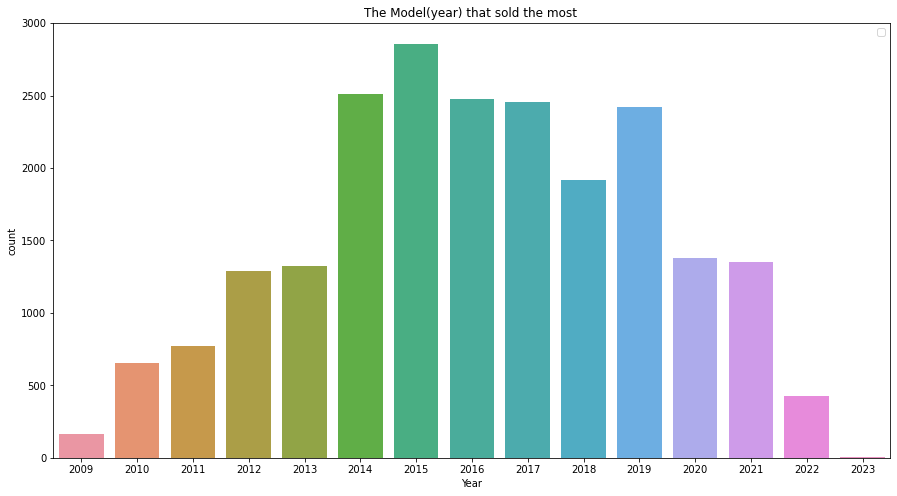

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,8))
sns.countplot(x='Year', data=new_df);
plt.title("The Model(year) that sold the most ")
plt.legend()
plt.show()

From the countplot, we can see that the 2015 car models have sold the most

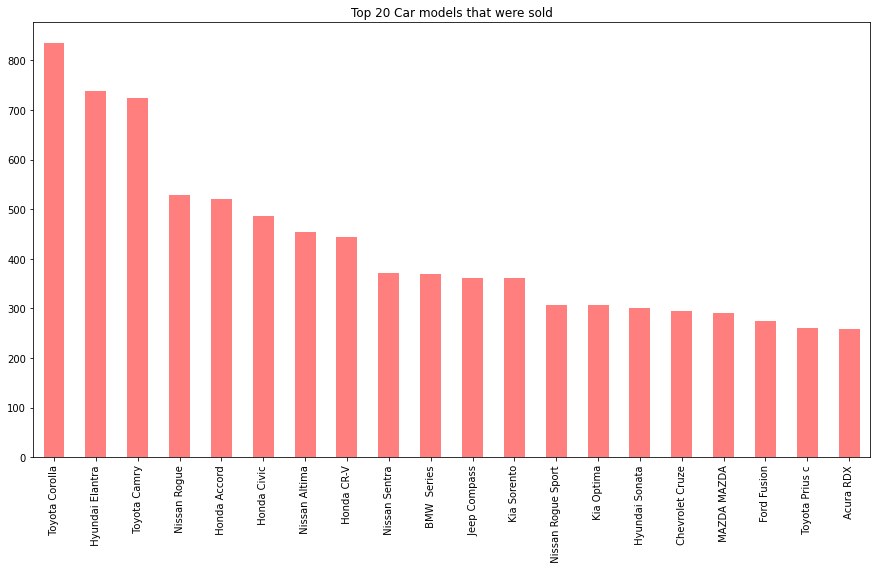

In [31]:
plt.figure(figsize = (15,8))
data['Name'].value_counts().head(20).plot.bar(color='r', alpha=0.5)
plt.title("Top 20 Car models that were sold")
plt.show()


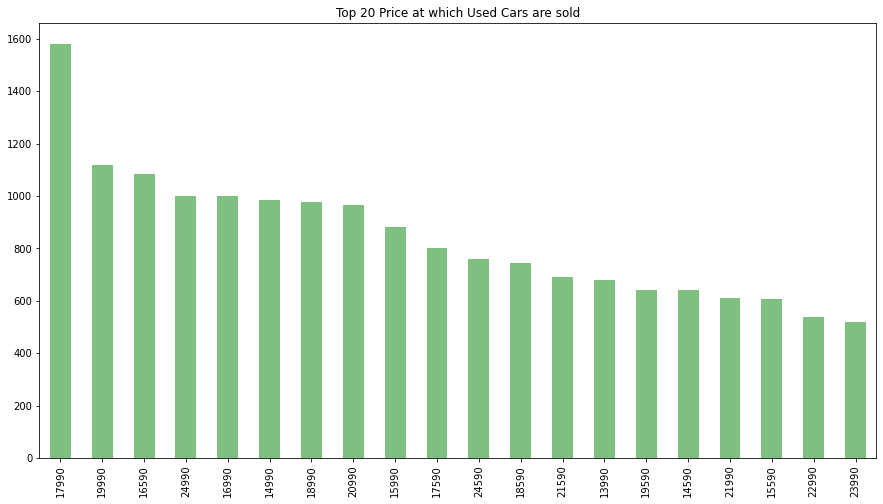

In [32]:
plt.figure(figsize = (15,8))
data['Price'].value_counts().head(20).plot.bar(color='g', alpha=0.5)
plt.title("Top 20 Price at which Used Cars are sold")
plt.show()

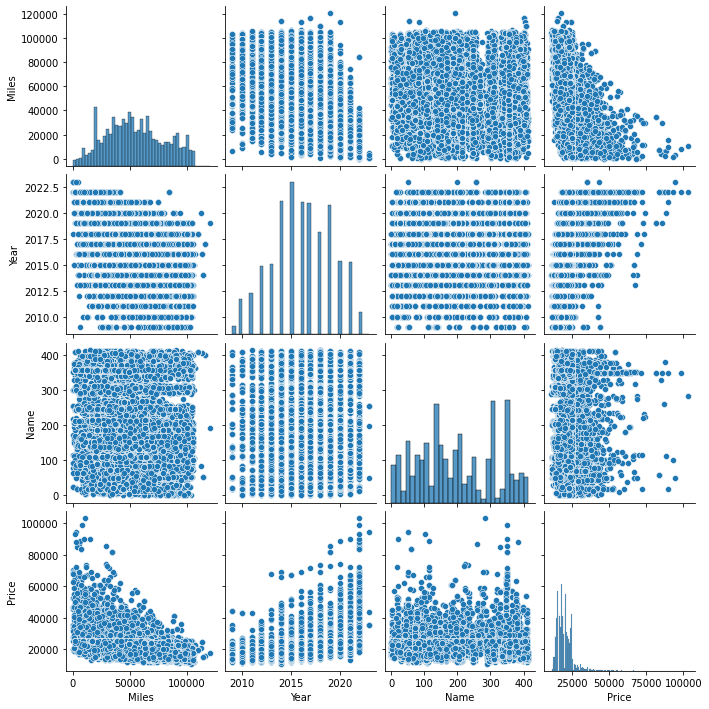

In [33]:
sns.pairplot(new_df);

In [34]:
new_df1=new_df1.drop(['Name'], axis=1)
new_df1.head()

,Miles,Year,Price
0,41946,2018,16990
1,45328,2020,23990
2,81068,2012,21590
3,35372,2019,21590
4,68992,2017,22990


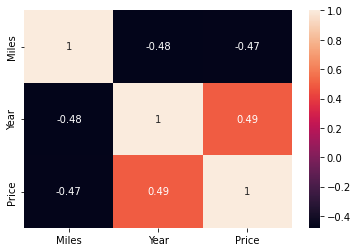

In [35]:
sns.heatmap(new_df1.corr(), annot=True);

From the pairplot and the heatmap, it is clear that the features, 'Year' and 'Price' are negatively correlated with 'Miles'. That is, as the number of miles driven increases the price of the car decreases. The feature 'Year' is positively correlated with 'Price', ie, The more recent the car is manufactured, the more price it fetches.

# Model building
## 1. Linear Regression

In [36]:
df2=new_df1["Price"]
new_df1=new_df1.drop(["Price"], axis=1)

In [37]:
X=new_df1
y=df2
print(X.shape)
y.shape

(22000, 2)


(22000,)

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.25, random_state=0)

In [39]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()

In [40]:
regressor.fit(X_train,y_train) # fit the model with the training set

LinearRegression()

In [41]:
y_pred=regressor.predict(X_test)

Evaluation of Regression Metrics

In [42]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [43]:
mse=mean_squared_error(y_test,y_pred)
print("Mean Squared Error = ", mse)
mae=mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error = ", mae)
print("Root Mean Squared Error = ", np.sqrt(mse))
print("R2 Score = ", r2_score(y_test, y_pred))
adj_r2=1 - (1-regressor.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)
print("Adjusted R2 = ", adj_r2)

Mean Squared Error =  28317104.274382737
Mean Absolute Error =  3405.384091352637
Root Mean Squared Error =  5321.381801222567
R2 Score =  0.32571681233086636
Adjusted R2 =  0.31537616008173885


## 2. Decision Tree Regression

In [44]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor(random_state=0)

In [45]:
model.fit(X,y)

DecisionTreeRegressor(random_state=0)

In [46]:
y_predict=model.predict(X_test)

In [47]:
mse_1=mean_squared_error(y_test, y_predict)
print("MSE = ", mse_1)
mae_1=mean_absolute_error(y_test, y_predict)
print("MAE = ", mae_1)
print("RMSE = ", np.sqrt(mse_1))
print("R2 Score = ", r2_score(y_test, y_predict))
print("Adjusted R2 = ", 1 - (1-model.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1))

MSE =  230524.20464501774
MAE =  29.755351226551227
RMSE =  480.1293624066515
R2 Score =  0.9945107877543978
Adjusted R2 =  0.9952732191664064


## Random Forest Regressor

In [48]:
from sklearn.ensemble import RandomForestRegressor


In [49]:
#To check the optimum value of n_estimators between 10 and 100
for i in range(10, 110, 10):
    reg= RandomForestRegressor(n_estimators=i, random_state=0)
    reg.fit(X,y)
    y_predicted = reg.predict(X_test)
    print("n_estimator= ", i)
    print("R2 Score = ", r2_score(y_test, y_predicted))

n_estimator=  10
R2 Score =  0.930874068684457
n_estimator=  20
R2 Score =  0.9379909285348262
n_estimator=  30
R2 Score =  0.940064598151111
n_estimator=  40
R2 Score =  0.9410704455870742
n_estimator=  50
R2 Score =  0.9422577231829201
n_estimator=  60
R2 Score =  0.9434541127596792
n_estimator=  70
R2 Score =  0.9428316227076495
n_estimator=  80
R2 Score =  0.9428403061278557
n_estimator=  90
R2 Score =  0.9420563730820557
n_estimator=  100
R2 Score =  0.9419986610691311


At n_estimator value of 60, The R squared is 94.35%.

In [50]:
reg=RandomForestRegressor(n_estimators=60, random_state=0)
reg.fit(X,y)

RandomForestRegressor(n_estimators=60, random_state=0)

In [51]:
y_predicted=reg.predict(X_test)

In [52]:
mse_1=mean_squared_error(y_test, y_predicted)
mae_1=mean_absolute_error(y_test, y_predicted)
print("Mean Squared Error = ", mse_1)
print("Mean_absolute_error = ", mae_1)
rmse_1=print("RMSE = ",  np.sqrt(mse_1))
print("R2 Score = ", r2_score(y_test, y_predicted))
print("Adjusted R2 = ", 1 - (1-reg.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1))

Mean Squared Error =  2374693.3255250617
Mean_absolute_error =  620.2189429271348
RMSE =  1541.0039991917806
R2 Score =  0.9434541127596792
Adjusted R2 =  0.9392312205727075


In [53]:
from prettytable import PrettyTable

In [54]:
print("Regression Models")
table=PrettyTable(["  ", "Linear Regression", "Decision Tree", "Random Forest"])
table.add_row(["MSE", "28317104.2743", "230524.20464", "2374693.3255"])
table.add_row(["MAE", "3405.38409", "29.75535","620.2189"])
table.add_row(["RMSE", "5321.3818", "480.1293", "1541.0039"])
table.add_row(["R Squared", "0.32571", "0.9945", "0.9434"])
table.add_row(["Adjusted R Squared", "0.3153", "0.9952", "0.93923"])
print(table)

Regression Models
+--------------------+-------------------+---------------+---------------+
|                    | Linear Regression | Decision Tree | Random Forest |
+--------------------+-------------------+---------------+---------------+
|        MSE         |   28317104.2743   |  230524.20464 |  2374693.3255 |
|        MAE         |     3405.38409    |    29.75535   |    620.2189   |
|        RMSE        |     5321.3818     |    480.1293   |   1541.0039   |
|     R Squared      |      0.32571      |     0.9945    |     0.9434    |
| Adjusted R Squared |       0.3153      |     0.9952    |    0.93923    |
+--------------------+-------------------+---------------+---------------+


From the above table, we can clearly see that the Decision Tree model has performed very well, with an R squared score of 99.45%

# Prediction using NLP

In [55]:
df=data[['Name', 'Price']]
df.head()

,Name,Price
0,Chevrolet Trax,16990
1,GMC Terrain,23990
2,Jeep Wrangler,21590
3,Jeep Renegade,21590
4,BMW X,22990


In [56]:
# convert all the strings to lowercase
corpus=df.Name.str.lower()
corpus

0                   chevrolet trax
1                      gmc terrain
2                    jeep wrangler
3                    jeep renegade
4                            bmw x
                   ...            
21995                 honda accord
21996                dodge charger
21997                  ford taurus
21998     toyota corolla hatchback
21999                  honda civic
Name: Name, Length: 22000, dtype: object

In [57]:
from sklearn.feature_extraction.text import CountVectorizer

In [58]:
corpus=corpus.to_list()

In [59]:
cv=CountVectorizer()

In [60]:
# bag of words
X_n=cv.fit_transform(corpus).toarray()
y=df.iloc[:,1]

In [61]:
print(X_n.shape)
y.shape

(22000, 364)


(22000,)

In [62]:
#split the data into train and test set
from sklearn.model_selection import train_test_split
X_n_train,X_n_test, y_train,y_test = train_test_split(X_n,y, test_size=0.3, random_state=0)

## Linear Regression

In [63]:
reg_nlp=LinearRegression()
reg_nlp.fit(X_n_train,y_train)

LinearRegression()

In [64]:
y_reg_nlp=reg_nlp.predict(X_n_test)

In [65]:
mse_r=mean_squared_error(y_test, y_reg_nlp)
print("Mean squared error = ", mse_r)
print("RMSE = ", np.sqrt(mse_r))
print("R Squared = ", r2_score(y_test, y_reg_nlp))

Mean squared error =  1.2740650309899121e+30
RMSE =  1128744891899809.2
R Squared =  -3.142081298633192e+22


## DecisionTree Regression

In [66]:
dt=DecisionTreeRegressor()
dt.fit(X_n,y)

DecisionTreeRegressor()

In [67]:
y_dt=dt.predict(X_n_test)

In [68]:
mse_dt=mean_squared_error(y_test, y_dt)
print("Mean squared error = ", mse_dt)
print("RMSE = ", np.sqrt(mse_dt))
print("R Squared = ", r2_score(y_test, y_dt))

Mean squared error =  14518960.27989268
RMSE =  3810.3753463264848
R Squared =  0.6419354392326138


## Random Forest Regression

In [69]:
rf=RandomForestRegressor(n_estimators=40, random_state=0)

In [70]:
rf.fit(X_n,y)

RandomForestRegressor(n_estimators=40, random_state=0)

In [71]:
y_rf=rf.predict(X_n_test)

In [72]:
mse_rf=mean_squared_error(y_test, y_rf)
print("Mean squared error = ", mse_rf)
print("RMSE = ", np.sqrt(mse_rf))
print("R Squared = ", r2_score(y_test, y_rf))

Mean squared error =  14610106.413306482
RMSE =  3822.3168907491804
R Squared =  0.6396876060822154


## Gradient Boosting Regression

In [73]:
from sklearn.ensemble import GradientBoostingRegressor

In [74]:
gbr=GradientBoostingRegressor()

In [75]:
gbr.fit(X_n_train,y_train)

GradientBoostingRegressor()

In [76]:
y_gbr=gbr.predict(X_n_test)

In [77]:
mse_gbr=mean_squared_error(y_test, y_gbr)
print("Mean squared error = ", mse_gbr)
print("RMSE = ", np.sqrt(mse_gbr))
print("R Squared = ", r2_score(y_test, y_gbr))

Mean squared error =  25929297.503301606
RMSE =  5092.0818437355865
R Squared =  0.36053530400627276


In [78]:
dataframe=pd.DataFrame([
                       ["Linear Regression", 1.274065, 1128744891899809.2, -3.142081],
                       ["Decision Tree Regression",14518960.2798,3810.37534, 0.64193],
                       ["Random Forest",14610106.4133, 3822.31689, 0.639687],
                       ["Gradient Boost", 25930055.8287, 5092.1563, 0.360516]
                        ])
dataframe.columns=(["Model", "MSE Values", "RMSE", "R Squared"])

In [79]:
dataframe

,Model,MSE Values,RMSE,R Squared
0,Linear Regression,1.274065e+00,1.128745e+15,-3.142081
1,Decision Tree Regression,1.451896e+07,3.810375e+03,0.641930
2,Random Forest,1.461011e+07,3.822317e+03,0.639687
3,Gradient Boost,2.593006e+07,5.092156e+03,0.360516


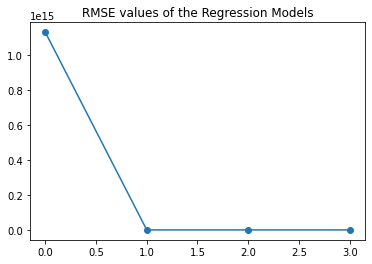

In [80]:
dataframe['RMSE'].plot.line(marker='o')
plt.title('RMSE values of the Regression Models')
plt.show()

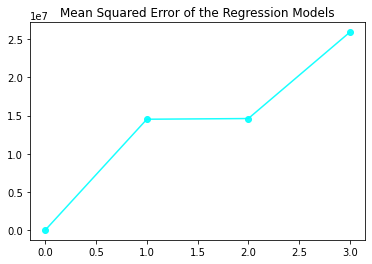

In [81]:
dataframe['MSE Values'].plot.line(color='cyan', alpha=0.9, marker='o')
plt.title("Mean Squared Error of the Regression Models")
plt.show()

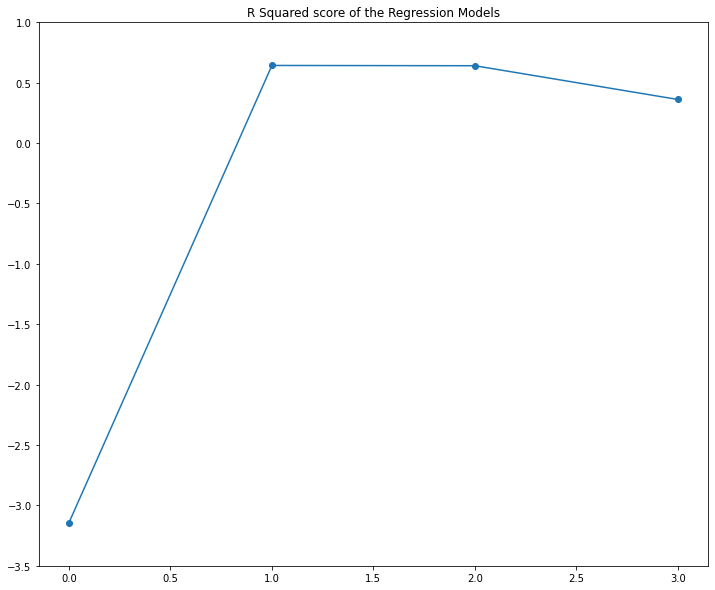

In [82]:
plt.figure(figsize=(12,10))
dataframe['R Squared'].plot.line(marker='o')
plt.title('R Squared score of the Regression Models')
plt.ylim(-3.5,1)
plt.show()

# Conclusion:

When R Squared scores are compared, the Decision Tree Regressoion model is a better fit with a score of 64.19% 